In [8]:
import matplotlib.pyplot as plt
import numpy as np

from modules.log import log
from modules.Request_Data import Get_Data
from modules.Data_Classes.Student import Student

<ipython-input-9-3affb8ea859a>:100: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  graphic.show()


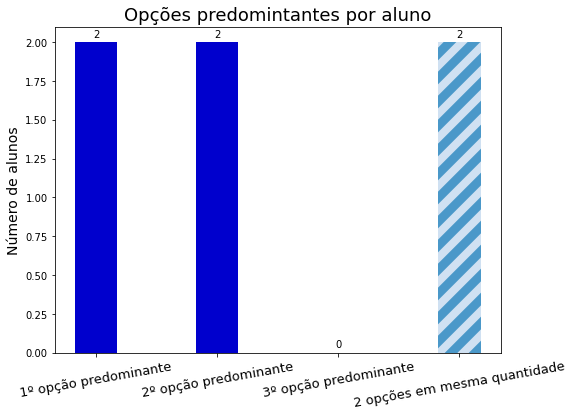

In [9]:


option_1_mean = [0]
option_2_mean = [0]
option_3_mean = [0]
draw_mean = [0]


students = Get_Data.students_data()

students_answers = Get_Data.answers_data()

for index in range(len(students)):
  student = Student(students_answers[index], students[index])
  predominant_options = student.predominant_options.split(', ')

  if ('option 1' in predominant_options 
      and 'option 2' not in predominant_options
      and 'option 3' not in predominant_options):
    option_1_mean[0] += 1
    continue
  
  if ('option 2' in predominant_options 
      and 'option 1' not in predominant_options
      and 'option 3' not in predominant_options):
    option_2_mean[0] += 1
    continue
  
  if ('option 3' in predominant_options 
      and 'option 2' not in predominant_options
      and 'option 1' not in predominant_options):
    option_3_mean[0] += 1
    continue
  
  draw_mean[0] += 1
  

  
@log
def major_medium_number(num_array: list) -> list:
  major, medium = [0, 0]

  for num in num_array:
    if num > major:
      medium = major
      major = num

    elif num > medium:
      medium = num

  return [major, medium]

major_medium_array = major_medium_number([option_1_mean[0], option_2_mean[0], option_3_mean[0]])

@log
def define_color(num: int, num_array: list) -> str:
  if num == major_medium_array[0]:
    return 'midnightblue'
  
  if num == major_medium_array[1]:
    return 'navy'

  return 'mediumblue'


  


def create_bars_graphic(data_array: list, title: tuple, ylabel: tuple, labels: list, bars_width: float, data_padding):
  figure, axes = plt.subplots(figsize=(8, 6))
  x = np.arange(len(labels))

  for index, data in enumerate(data_array):
    if index != 3:
      rect = axes.bar(index, data, width=bars_width, color=define_color(data, major_medium_array))
    else:
      cmap = plt.get_cmap("Blues")
      plt.rcParams['hatch.color'] = cmap(0.2)
      plt.rcParams['hatch.linewidth'] = 8
      rect = axes.bar(index, data, width=bars_width, color=cmap(0.6), hatch='/')

    axes.bar_label(rect, padding=data_padding)

  axes.set_title(title[0], size=title[1])

  axes.set_ylabel(ylabel[0], size=ylabel[1])

  axes.set_xticks(x)
  axes.set_xticklabels(labels, rotation=10, fontsize=13, verticalalignment='top')

  return figure

labels = ['1º opção predominante', '2º opção predominante', '3º opção predominante', '2 opções em mesma quantidade']
data_array = [option_1_mean, option_2_mean, option_3_mean, draw_mean]
title = ('Opções predomintantes por aluno', 18)
ylabel = ('Número de alunos', 14)
width = 0.35
data_padding = 3

graphic = create_bars_graphic(data_array, title, ylabel, labels, width, data_padding)

graphic.show()

# rects1 = axes.bar(0, option_1_mean, width=0.35, color=define_color(option_1_mean[0], major_medium_array))
# rects2 = axes.bar(1, option_2_mean, width=0.35, color=define_color(option_2_mean[0], major_medium_array))
# rects3 = axes.bar(2, option_3_mean, width=0.35, color=define_color(option_3_mean[0], major_medium_array))
# rects4 = axes.bar(3, draw_mean, width=0.35, color=define_color(draw_mean[0], major_medium_array))


# axes.bar_label(rects1, padding=3)
# axes.bar_label(rects2, padding=3)
# axes.bar_label(rects3, padding=3)
# axes.bar_label(rects4, padding=3)


# axes.set_title('Opções predominantes por aluno', size=18)

# axes.set_ylabel('Número de alunos', size=14)

# axes.set_xticks(x)
# axes.set_xticklabels(labels, rotation=10, fontsize=13, verticalalignment='top')





